In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()

#Configure Defaults
import warnings
warnings.filterwarnings('ignore')

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## One-hot coding 선형 회귀 예측
Random effects and fixed effects

,city,year,rent,rent_mean_city
0,Bangaluru,2010,2499,2500
1,Bangaluru,2011,2500,2500
2,Bangaluru,2012,2501,2500
3,Seoul,2010,3499,3500
4,Seoul,2011,3500,3500
5,Seoul,2012,3501,3500
6,Vancouber,2010,3999,4000
7,Vancouber,2011,4000,4000
8,Vancouber,2012,4001,4000


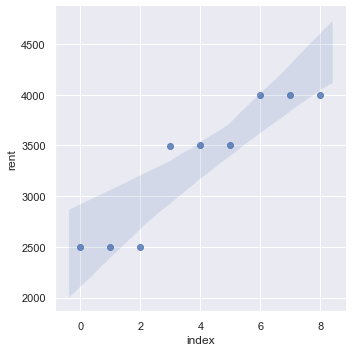

In [4]:
city = ['Bangaluru']*3 + ['Seoul']*3 + ['Vancouber']*3
year = [2010, 2011, 2012]*3
rent =[2499, 2500, 2501, 3499, 3500, 3501, 3999, 4000, 4001]
df = pd.DataFrame(zip(city, year, rent), columns = ['city', 'year', 'rent'])
map_mean = df.groupby(['city'])['rent'].mean().to_dict()
df['rent_mean_city'] = df['city'].map(map_mean)
df
sns.lmplot(x='index', y='rent', data=df.reset_index())

## one_hot encoding

In [5]:
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df['city'] = df['city']

X = one_hot_df[['city_Bangaluru', 'city_Seoul', 'city_Vancouber']]
y = one_hot_df['rent']

LinearRegression()

3333.3333333333335

array([-833.33333333,  166.66666667,  666.66666667])

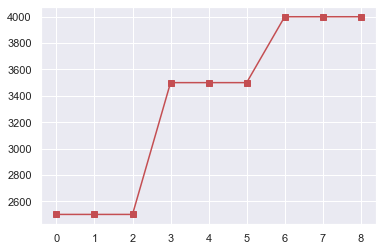

In [6]:
from sklearn import linear_model
model= linear_model.LinearRegression()
model.fit(X, y)
model.intercept_; model.coef_ 
var_predict = X.values@model.coef_.reshape(-1,1)
one_hot_df['predict'] = model.intercept_ + var_predict
plt.plot(one_hot_df.index, one_hot_df['predict'], marker='s', color='r')

In [7]:
df['rent'].mean()
model.intercept_

3333.3333333333335

3333.3333333333335

## dummy

In [8]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df['city'] = df['city']
dummy_df
model.fit(dummy_df.iloc[:, 3:5], dummy_df['rent'])
model.intercept_; model.coef_

,year,rent,rent_mean_city,city_Seoul,city_Vancouber,city
0,2010,2499,2500,0,0,Bangaluru
1,2011,2500,2500,0,0,Bangaluru
2,2012,2501,2500,0,0,Bangaluru
3,2010,3499,3500,1,0,Seoul
4,2011,3500,3500,1,0,Seoul
5,2012,3501,3500,1,0,Seoul
6,2010,3999,4000,0,1,Vancouber
7,2011,4000,4000,0,1,Vancouber
8,2012,4001,4000,0,1,Vancouber


LinearRegression()

2500.0000000000005

array([1000., 1500.])

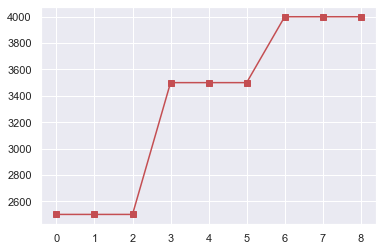

In [9]:
var_predict = dummy_df.iloc[:, 3:5].values@model.coef_.reshape(-1,1)
dummy_df['predict'] = model.intercept_ + var_predict
plt.plot(dummy_df.index, dummy_df['predict'], marker='s', color='r')

In [10]:
model.intercept_
df[df['city'] == 'Bangaluru']['rent'].mean()
df[df['city'] == 'Seoul']['rent'].mean()
df[df['city'] == 'Vancouber']['rent'].mean()

2500.0000000000005

2500.0

3500.0

4000.0

### Effect Coding

In [11]:
effect_df = dummy_df.copy()
effect_df.loc[0:2, ['city_Seoul', 'city_Vancouber']] = -1.0
effect_df
model.fit(effect_df[['city_Seoul', 'city_Vancouber']], effect_df['rent'])
model.intercept_; model.coef_

,year,rent,rent_mean_city,city_Seoul,city_Vancouber,city,predict
0,2010,2499,2500,-1.0,-1.0,Bangaluru,2500.0
1,2011,2500,2500,-1.0,-1.0,Bangaluru,2500.0
2,2012,2501,2500,-1.0,-1.0,Bangaluru,2500.0
3,2010,3499,3500,1.0,0.0,Seoul,3500.0
4,2011,3500,3500,1.0,0.0,Seoul,3500.0
5,2012,3501,3500,1.0,0.0,Seoul,3500.0
6,2010,3999,4000,0.0,1.0,Vancouber,4000.0
7,2011,4000,4000,0.0,1.0,Vancouber,4000.0
8,2012,4001,4000,0.0,1.0,Vancouber,4000.0


LinearRegression()

3333.3333333333335

array([166.66666667, 666.66666667])

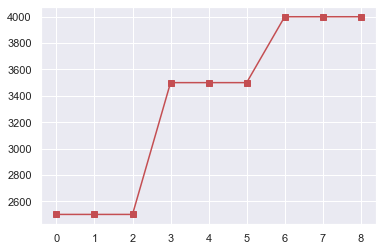

In [12]:
var_predict = effect_df.iloc[:, 3:5].values@model.coef_.reshape(-1,1)
effect_df['predict'] = model.intercept_ + var_predict
plt.plot(effect_df.index, effect_df['predict'], marker='s', color='r')

Variation for dependents and regressors
- overall variation; variation over time and individuals
- between variation; variation between individuals
- within deviation; variation within individuals (over time)

In [13]:
df['overall_mean'] = df['rent'].mean()
df['overall_deviation'] =  df['rent'] - df['overall_mean']
df['between_deviation'] = df['rent_mean_city'] - df['overall_mean']
df['within_deviation'] = df['rent'] - df['rent_mean_city']
df.round(2)

,city,year,rent,rent_mean_city,overall_mean,overall_deviation,between_deviation,within_deviation
0,Bangaluru,2010,2499,2500,3333.33,-834.33,-833.33,-1
1,Bangaluru,2011,2500,2500,3333.33,-833.33,-833.33,0
2,Bangaluru,2012,2501,2500,3333.33,-832.33,-833.33,1
3,Seoul,2010,3499,3500,3333.33,165.67,166.67,-1
4,Seoul,2011,3500,3500,3333.33,166.67,166.67,0
5,Seoul,2012,3501,3500,3333.33,167.67,166.67,1
6,Vancouber,2010,3999,4000,3333.33,665.67,666.67,-1
7,Vancouber,2011,4000,4000,3333.33,666.67,666.67,0
8,Vancouber,2012,4001,4000,3333.33,667.67,666.67,1


# BaseEstimator, TransformerMixin 사용자정의 함수와 파이프라인
### BaseExtimator, TranformarMxin, Class, inheritance
#### MeanCategoricalEncoder
https://feature-engine.readthedocs.io/en/latest/encoders/MeanCategoricalEncoder.html
#### put-customized-functions-in-sklearn-pipeline
https://stackoverflow.com/questions/31259891/put-customized-functions-in-sklearn-pipeline

## Brier score

In [23]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.3])

In [27]:
brier_score_loss(y_true, y_prob)
brier_score_loss(y_true, y_prob, pos_label=1)
brier_score_loss(y_true, y_prob, pos_label=0)

0.03749999999999999

0.03749999999999999

0.6875

In [29]:
brier_score_loss(y_true, 1-y_prob, pos_label=0)
brier_score_loss(y_true_categorical, y_prob, pos_label="ham")

0.0375

0.03749999999999999

In [30]:
brier_score_loss(y_true, np.array(y_prob) > 0.5)

0.0

In [35]:
brier_score_loss(y_true, np.array([False,  True,  True, False]))
brier_score_loss(y_true, np.array([True,  False,  False, True]))
brier_score_loss(y_true, np.array([0,  1,  1, 0]))
brier_score_loss(y_true, np.array([1,  0,  0, 1]))

0.0

1.0

0.0

1.0

In [95]:
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])

y_smart = np.array([0.1, 0.9, 0.8, 0.3])
y_normal = np.array([0.4, 0.3, 0.6, 0.2])
y_dummy = np.array([0.5, 0.5, 0.5, 0.5])
y_stupid = np.array([0.9, 0.1, 0.7, 0.7])

In [96]:
brier_score_loss(y_true, y_smart)
brier_score_loss(y_true, y_normal)
brier_score_loss(y_true, y_dummy)
brier_score_loss(y_true, y_stupid)

0.03749999999999999

0.2125

0.25

0.55

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



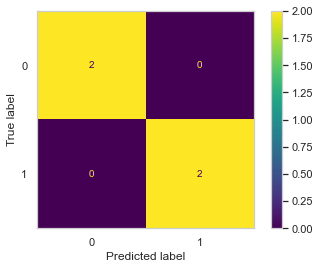

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = np.array(y_smart) > 0.5
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_true, y_pred))

# Visualizations with Display Objects - regress

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

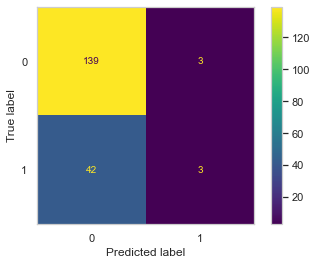

In [5]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [16]:
y_pred[0:10]

array(['1', '1', '1', '1', '1', '1', '1', '1', '2', '1'], dtype=object)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)

In [15]:
y_score[0:10]

array([-1.70997677, -0.52235109, -1.86565861, -1.60779181, -2.89769535,
       -2.26203924, -0.53280776, -2.28295258,  0.01756195, -1.46758522])

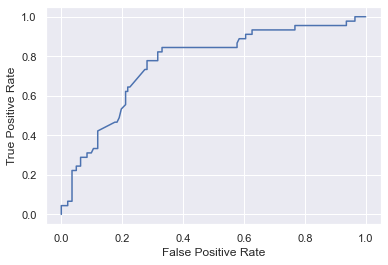

In [12]:
sns.set()
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

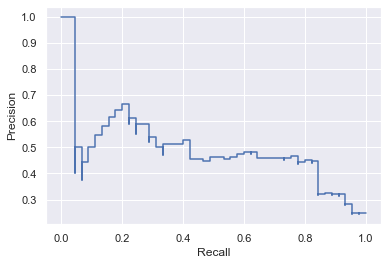

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

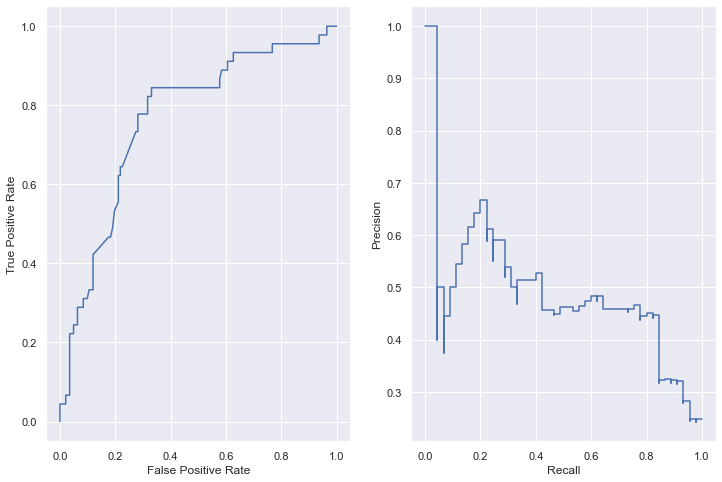

In [14]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

# Out of bag in random forest

OOB Errors for Random Forests
https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

In [34]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

- NOTE: Setting the `warm_start` construction parameter to `True` disables
- support for parallelized ensembles but is necessary for tracking the OOB
- error trajectory during training.

In [35]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, random_state=RANDOM_STATE))
]

In [36]:
[label for label, _ in ensemble_clfs]
((label, []) for label, _ in ensemble_clfs)
OrderedDict((label, []) for label, _ in ensemble_clfs)
type(OrderedDict((label, []) for label, _ in ensemble_clfs))

["RandomForestClassifier, max_features='sqrt'",
 "RandomForestClassifier, max_features='log2'",
 'RandomForestClassifier, max_features=None']

<generator object <genexpr> at 0x000002C2E77794F8>

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

collections.OrderedDict

In [37]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [38]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

In [39]:
# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

In [40]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features='log2', oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features='log2', n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=15, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=16, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=17, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=18, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=19, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=20, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=21, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=22, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=23, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=24, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=25, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=26, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=27, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=28, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=29, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=30, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=31, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=32, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=33, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=34, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=35, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=36, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=37, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=38, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=39, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=40, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=41, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=42, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=43, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=44, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=45, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=46, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=47, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=48, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=49, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=50, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=51, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=52, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=53, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=54, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=55, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=56, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=57, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=58, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=59, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=60, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=61, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=62, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=63, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=64, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=65, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=66, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=67, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=68, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=69, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=70, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=71, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=72, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=73, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=74, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=75, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=76, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=77, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=78, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=79, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=80, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=81, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=82, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=83, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=84, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=85, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=86, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=87, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=88, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=89, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=90, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=91, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=92, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=93, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=94, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=95, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=96, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=97, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=98, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=99, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features=None, oob_score=True, random_state=123,
                       warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=101, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=102, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=103, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=104, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=105, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=106, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=107, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=108, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=109, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=110, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=111, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=112, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=113, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=114, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=115, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=116, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=117, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=118, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=119, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=120, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=121, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=122, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=123, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=124, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=125, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=126, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=127, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=128, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=129, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=130, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=131, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=132, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=133, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=134, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=135, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=136, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=137, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=138, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=139, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=140, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=141, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=142, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=143, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=144, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=145, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=146, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=147, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=148, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=149, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=150, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=151, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=152, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=153, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=154, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=155, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=156, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=157, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=158, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=159, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=160, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=161, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=162, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=163, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=164, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=165, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=166, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=167, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=168, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=169, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=170, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=171, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=172, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=173, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=174, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

RandomForestClassifier(max_features=None, n_estimators=175, oob_score=True,
                       random_state=123, warm_start=True)

(15.0, 175.0)

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'OOB error rate')

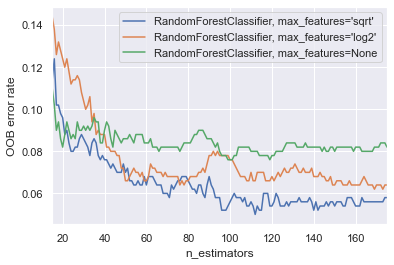

In [55]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Out of bag in random forest

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, 
                                                    test_size=0.25, stratify=iris.target, 
                                                    random_state=1357)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=357)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=357)

In [16]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.938
Mean accuracy score: 1.0


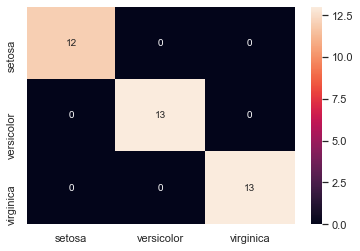

In [17]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), 
                  columns=iris.target_names, 
                  index=iris.target_names)

sns.heatmap(cm, annot=True)

In [44]:
n=10000
trials = 10000
print(f'1 회 비복원추출시 뽑힐 확률은 {1/n}')
print(f'1 회 비복원추출시 안 뽑힐 확률은 {(1-1/n)}')

print(f'{trials}번 비복원 추출시 계속 뽑힐 확률은 {(1/n)**trials}')
print(f'{trials}번 비복원 추출시 계속 안 뽑힐 확률은 {(1-1/n)**trials}')

1 회 비복원추출시 뽑힐 확률은 0.0001
1 회 비복원추출시 안 뽑힐 확률은 0.9999
10000번 비복원 추출시 계속 뽑힐 확률은 0.0
10000번 비복원 추출시 계속 안 뽑힐 확률은 0.36786104643297046


https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Mikhail Tribunskiy, @MITribunskiy
    
## <center> Tutorial
### <center> "CatBoost overview"

int와 lableencoder()를 해도 int가 됨

# sklearn: 50 best tips and tricks
https://www.kaggle.com/python10pm/sklearn-50-best-tips-and-tricks

Trick 6: Common ways to encode categorical features: OneHotEncoder, OrdinalEncoder

In [3]:
d = {
"Shape":["square", "square", "oval", "circle"],
"Class":["third", "first", "second", "third"],
"Size":["S", "S", "L", "XL"]
}

df = pd.DataFrame(d)
df

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [8]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
Shape,object,0,0.0,3
Class,object,0,0.0,3
Size,object,0,0.0,3


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_transformed = le.fit_transform(df[["Shape"]]) 
label_transformed
label_transformed.T@label_transformed

array([2, 2, 1, 0])

9

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [5]:
print("Transform categorical data using OneHotEncoder")
ohe = OneHotEncoder(sparse = False) # if you don't put false, you will get a sparse matrix object
shaped_transformed = ohe.fit_transform(df[["Shape"]]) # if you pass as a series, you will need to reshape the data. Notice the double square bracket
shaped_transformed

Transform categorical data using OneHotEncoder


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [32]:
print("Transform categorical data using OrdinalEncoder")
print("When using OrdinalEncoder, your data has to have a order: like first class, second class, third class")
oe = OrdinalEncoder(categories = [["first", "second", "third"], # order for the column Class
                                  ["S", "M", "L", "XL"]]) # order for the column Size
categorical_ordinal_transformed = oe.fit_transform(df[["Class", "Size"]])
categorical_ordinal_transformed

Transform categorical data using OrdinalEncoder
When using OrdinalEncoder, your data has to have a order: like first class, second class, third class


array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

## 결측치 채우기 (Imputation)

In [19]:
dir_path = 'd:/Python_data/data/'
df = pd.read_pickle(dir_path + 'df31.pkl')

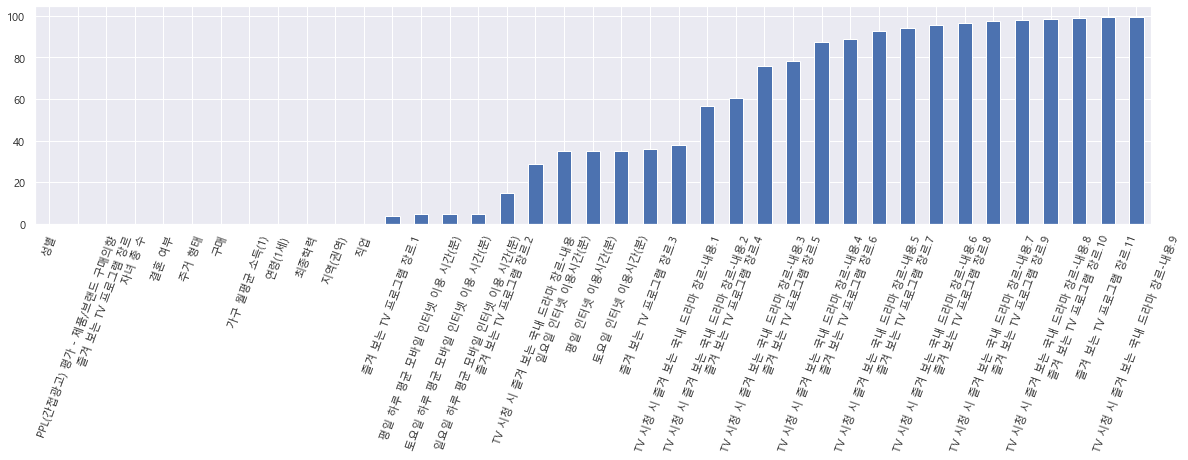

In [20]:
plt.rcParams['font.family']='Malgun Gothic' 

null_percent = df.isnull().mean()*100
null_percent.sort_values().plot.bar(figsize=(20,4), rot='70')

In [21]:
print('결측치 처리 전 df shape : ', df.shape)
null_filtered = null_percent[null_percent > 60].index
df = df.drop(null_filtered, axis =1) # df.drop(missing_col, axis =1, inplace=True)
print('결측치 처리 후 df shape : ', df.shape)

결측치 처리 전 df shape :  (4000, 39)
결측치 처리 후 df shape :  (4000, 24)


In [22]:
col_name = ['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', 
            '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일',
            'TV1', 'TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3', '구매의향', '구매']
df.columns = col_name
del df['구매의향']

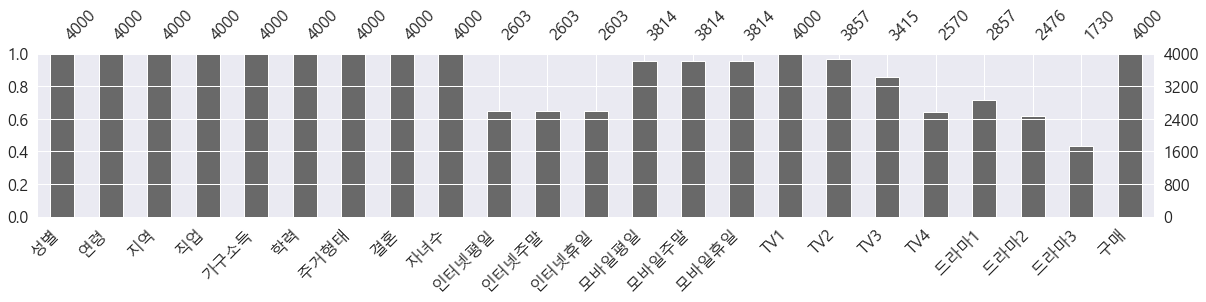

In [23]:
msno.bar(df, figsize=(20,3)) # msno.matrix(df, figsize=(20,3)) 

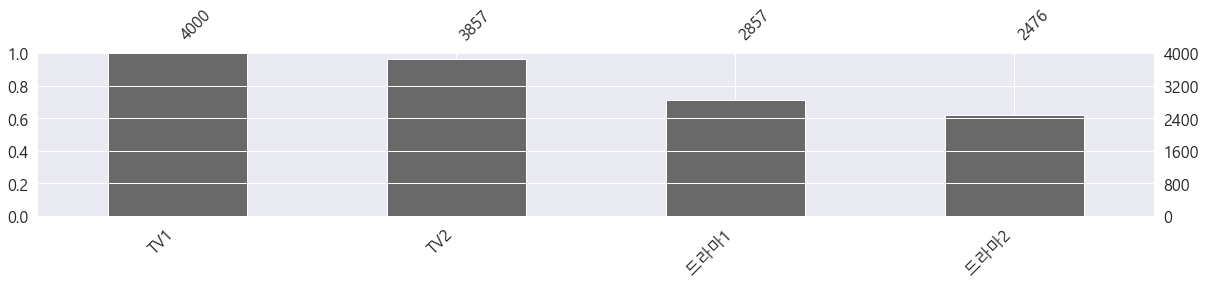

In [24]:
tf = df[['TV1', 'TV2', '드라마1', '드라마2']]
msno.bar(tf, figsize=(20,3))

1. 중앙값으로 대체 (SimpleImputer)

In [25]:
from sklearn.impute import SimpleImputer
drama2 = tf['드라마1'].values.reshape(-1, 1)
tf['드라마1'] = SimpleImputer(strategy = "median").fit_transform(drama2)

2. knn 모델로 대체 (KNNImputer)

In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
tf['드라마2'] = imputer.fit_transform(tf['드라마2'].values.reshape(-1, 1))

3. 로지스틱모델로 대체

## 특정 컬럼 nan 제거

df.dropna(subset=[컬럼명], inplace=True)가 올바른 방법

df[컬러명]dropna(inplace=True)명령어는 작동은 되나 

<font color='red'> ValueError: shape of passed values is (  ,  ), indicies imply(   ,   )

In [6]:
df = pd.DataFrame({'a':[1,2,np.nan,np.nan], 'b':[4,np.nan,6,np.nan], 'c':[np.nan, 8,9,np.nan], 'd':[np.nan,np.nan,np.nan,np.nan]})
df

,a,b,c,d
0,1.0,4.0,NaN,NaN
1,2.0,NaN,8.0,NaN
2,NaN,6.0,9.0,NaN
3,NaN,NaN,NaN,NaN


In [7]:
df.notnull().any(axis = 0)

a     True
b     True
c     True
d    False
dtype: bool

df[df.notnull().any(axis = 0)]는 error

In [13]:
df.loc[:, df.notnull().any(axis = 0)]

,a,b,c
0,1.0,4.0,NaN
1,2.0,NaN,8.0
2,NaN,6.0,9.0
3,NaN,NaN,NaN


Or filter columns and then select by []:

In [12]:
df[df.columns[df.notnull().any(axis = 0)]]

,a,b,c
0,1.0,4.0,NaN
1,2.0,NaN,8.0
2,NaN,6.0,9.0
3,NaN,NaN,NaN


# False positive paradox

In [175]:
cross = np.array([[9801, 99], [0, 100]])
data = pd.DataFrame(cross, index=['Uninfected', 'Infected'], 
                    columns=['Test negative', 'Test positive'])
data['Total']= data.sum(axis=1)
data.loc['Total'] = data.sum()
data

,Test negative,Test positive,Total
Uninfected,9801,99,9900
Infected,0,100,100
Total,9801,199,10000


In [176]:
tn = data.iloc[0,0]; fp=data.iloc[0,1]
fn = data.iloc[1,0]; tp=data.iloc[1,1]
fpr = fp/data.iloc[0,2]; tpr = tp/data.iloc[1,2]
print(f'알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 {fpr*100} %')
print(f'알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 {tpr*100} %')

알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 1.0 %
알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 100.0 %


In [177]:
print(f'알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 {tp/(fp+tp)*100} %')

알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 50.25125628140703 %


In [194]:
cross = np.array([[9801, 99], [50, 50]])
data = pd.DataFrame(cross, index=['Uninfected', 'Infected'], 
                    columns=['Test negative', 'Test positive'])
data['Total']= data.sum(axis=1)
data.loc['Total'] = data.sum()
data

tn = data.iloc[0,0]; fp=data.iloc[0,1]
fn = data.iloc[1,0]; tp=data.iloc[1,1]
fpr = fp/data.iloc[0,2]; tpr = tp/data.iloc[1,2]
print(f'알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 {fpr*100} %')
print(f'알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 {tpr*100} %')

print(f'알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 {tp/(fp+tp)*100} %')

,Test negative,Test positive,Total
Uninfected,9801,99,9900
Infected,50,50,100
Total,9851,149,10000


알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 1.0 %
알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 50.0 %
알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 33.557046979865774 %


In [191]:
cross = np.array([[4901, 99], [0, 5000]])
data = pd.DataFrame(cross, index=['Uninfected', 'Infected'], 
                    columns=['Test negative', 'Test positive'])
data['Total']= data.sum(axis=1)
data.loc['Total'] = data.sum()
data

tn = data.iloc[0,0]; fp=data.iloc[0,1]
fn = data.iloc[1,0]; tp=data.iloc[1,1]
fpr = fp/data.iloc[0,2]; tpr = tp/data.iloc[1,2]
print(f'알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 {fpr*100} %')
print(f'알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 {tpr*100} %')

print(f'알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 {tp/(fp+tp)*100} %')

,Test negative,Test positive,Total
Uninfected,4901,99,5000
Infected,0,5000,5000
Total,4901,5099,10000


알러지가 없는데 있다고 진단할 확률(허위양성율, fpr)은 1.9800000000000002 %
알러지가 있는데 없다고 진단할 확률(참음성율, tpr)은 100.0 %
알러지 진단을 받았는데 실제 알러지일 확률(양성 정밀도)은 98.05844283192783 %


# False positive paradox
https://kharshit.github.io/blog/2018/10/12/false-positive-paradox

### population A

In [99]:
cross = np.array([[570, 30], [0, 400]])
data = pd.DataFrame(cross, index=['Uninfected (Negative)', 'Infected (Positive)'], columns=['Test Negative', 'Test Positive'])
data['Total']= data.sum(axis=1)
data.loc['Total'] = data.sum()
data

,Test Negative,Test Positive,Total
Uninfected (Negative),570,30,600
Infected (Positive),0,400,400
Total,570,430,1000


Here, the false positive rate is (FP/600(total actual positive))= 30/600 = 5% and the accuracy of the test is (TP+TN)/N = (400+570)/1000 = 97%.

<font color='red'> Thus, a person having a positive test result in A will have 93% chances that he/she is infected. 

### population B

In [104]:
cross = np.array([[931, 49], [0, 20]])
data = pd.DataFrame(cross, index=['Uninfected (Negative)', 'Infected (Positive)'], columns=['Test Negative', 'Test Positive'])
data['Total']= data.sum(axis=1)
data.loc['Total'] = data.sum()
data

,Test Negative,Test Positive,Total
Uninfected (Negative),931,49,980
Infected (Positive),0,20,20
Total,931,69,1000


Here, the false positive rate is 49/980 = 5%; the accuracy of the test is (20+951)/1000 = 97%

<font color='red'> Thus, a person having a positive test result in A will have 5% chances that he/she is infected. 

- Thus, a person having a positive test result in A will have 93% chances that he/she is infected. On the other hand, the same person having positive test result after takes the same test in B will have only 2.96% chance of being infected for a 95% accurate test.

- So, in a society with very few infected people—fewer proportionately than the test gives false positives—there will actually be more who test positive for a disease incorrectly and don’t have it than those who test positive accurately and do.

These results seems to be a paradox. The probability of a positive test result is determined not only by the accuracy of the test but by the characteristics of the sampled population also. But if you look closely and don’t judge a test based only on its accuracy, you will know that it’s not a paradox but simple statistics even though it may seem counter-intuitive.

The false positive paradox is a type of <font color='red'> base rate fallacy, <font color='black'> where our mind tends to ignore the base information such as population and focuses on the specific information such as accuracy. These paradox arises due to a flaw in our reasoning that violates principles of probability such as Bayes theorem.

## Odds ratio

In [80]:
cross = np.array([[20, 80], [5, 95]])
data = pd.DataFrame(cross, index=['smoker', 'non-smoke'], columns=['disease', 'non-disease'])
data['행 합계']= data.sum(axis=1)
data.loc['열 합계'] = data.sum()
data

,disease,non-disease,행 합계
smoker,20,80,100
non-smoke,5,95,100
열 합계,25,175,200


In [81]:
print(f'흡연자가 병에 걸릴 확률은 {20/100}, 비흡연자가 병에 걸릴 확률은 {5/100}')
print(f'비흡연자와 비교하여 흡연자가 병에 걸릴 상대적인 위험도는 {(20/100)/(5/100)} 배가 된다.')

흡연자가 병에 걸릴 확률은 0.2, 비흡연자가 병에 걸릴 확률은 0.05
비흡연자와 비교하여 흡연자가 병에 걸릴 상대적인 위험도는 4.0 배가 된다.


In [82]:
print(f'흡연자가 병에 걸릴 odds는 {20/80}, 비흡연자가 병에 걸릴 odds은 {5/95}')
print(f'흡연자가 병에 걸릴 odds ratio는 {(20/80)/(5/95)} 이다.')
print(f'비흡연자가 병에 걸릴 odds ratio는 {1/((20/80)/(5/95))} 이다.')

흡연자가 병에 걸릴 odds는 0.25, 비흡연자가 병에 걸릴 odds은 0.05263157894736842
흡연자가 병에 걸릴 odds ratio는 4.75 이다.
비흡연자가 병에 걸릴 odds ratio는 0.21052631578947367 이다.


In [83]:
import statsmodels.api as sm
table = sm.stats.Table2x2(cross)
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,4.750,,1.706,13.227,0.003
Log odds ratio,1.558,0.523,0.534,2.582,0.003
Risk ratio,4.000,,1.563,10.240,0.004
Log risk ratio,1.386,0.480,0.446,2.326,0.004


## 프랑스 콩도르세의 배심원정리(Condorcet's jury theorem)

<Figure size 1080x432 with 0 Axes>

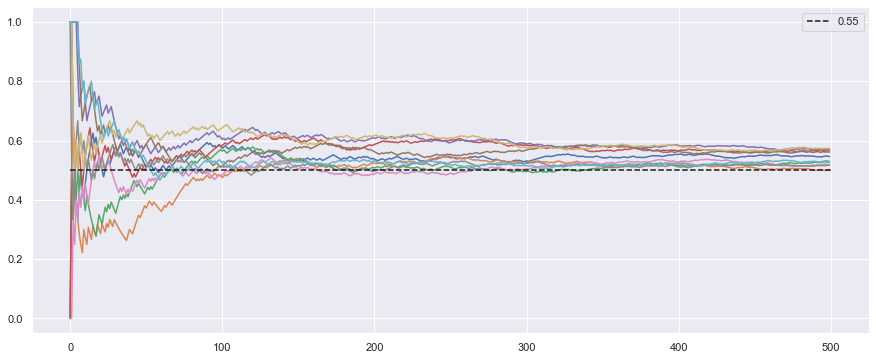

In [40]:
jurors_proba = 0.55
num_jurors = 10; num_trals = 500
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(15,6)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label=jurors_proba)
plt.legend(loc='higher right')

# Gaussain process
https://www.youtube.com/watch?v=4vGiHC35j9s

In [13]:
def kernel(x1, x2) :
    # gaussian process squared exponetial kernel
    gp_sek = np.sum(x1**2, 1).reshape(-1,1) + np.sum(x1**2, 1) -2*np.dot(x1, x2.T)
    return np.exp(-.5*gp_sek)

In [14]:
n = 50
X_train = np.linspace(-5,5, n).reshape(-1,1)
k = kernel(X_train, X_train)

In [15]:
# draw sample from the prior at X_train
L = np.linalg.cholesky(k + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n, 10)))
# f_prior = np.dot(k, np.random.normal(size=(n, 10)))

## prior probability

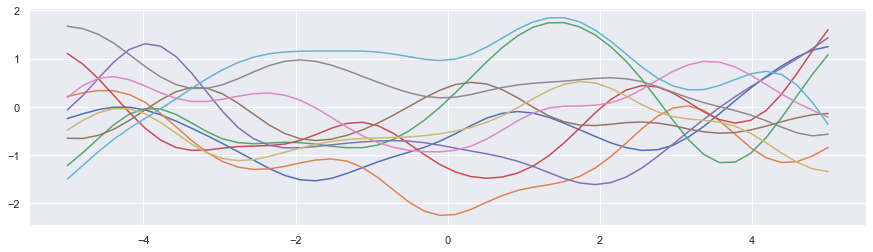

In [16]:
fig = plt.figure(figsize=(15,4))
plt.plot(X_train, f_prior)

In [18]:
np.random.normal(size=50).mean()
np.random.normal(size=(n, 100)).mean()
np.random.normal(size=(n, 100)).std()

0.018625966395571802

0.004970865281953471

1.0048906027815825

In [17]:
pd.DataFrame(np.random.normal(size=(n, 10))).mean()
pd.DataFrame(np.dot(L, np.random.normal(size=(n, 10)))).mean()

0   -0.255666
1   -0.140190
2   -0.090539
3    0.041426
4    0.289047
5    0.012288
6   -0.290227
7   -0.063173
8   -0.092498
9    0.130982
dtype: float64

0    0.137486
1   -0.362176
2   -0.380767
3    1.034674
4    1.104545
5    0.377091
6    0.033982
7   -0.983656
8    0.236756
9    0.743059
dtype: float64

# Introduction to Bayesian Inference
https://www.ritchievink.com/blog/2019/06/10/bayesian-inference-how-we-are-able-to-chase-the-posterior/

# 1. Simple example
Assume that we have observed two data points; 
D
=
{
195
,
182
}
. Both are observed lengths in cm of men in a basketball competition.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

lengths = np.array([195, 182])

## 1.1 Likelihood function
I assume that the distribution of the true weights (the posterior) follow a Gaussian distribution. A Gaussian is parameterized with a mean 
μ
 and variance 
σ
2
. For a reasonable domain of these parameters 
θ
=
{
μ
,
σ
}
 we can compute the likelihood 
P
(
D
|
θ
)
=
P
(
D
|
μ
,
σ
)
.

In [20]:
# lets create a grid of our two parameters
mu = np.linspace(150, 250)
sigma = np.linspace(0, 15)[::-1]
mm, ss = np.meshgrid(mu, sigma)  # just broadcasted parameters

Text(0.5, 0, '$\\mu$')

Text(0, 0.5, '$\\sigma$')

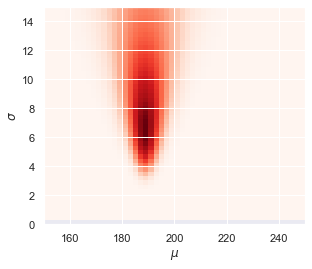

In [21]:
likelihood = stats.norm(mm, ss).pdf(lengths[0]) * stats.norm(mm, ss).pdf(lengths[1])
aspect = mm.max() / ss.max() / 3
extent = [mm.min(), mm.max(), ss.min(), ss.max()]
# extent = left right bottom top

plt.imshow(likelihood, cmap='Reds', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

### Likelihood function results
As we can see, the likelihood function represents the most likely parameters. If we would infer the most likely parameters 
θ
 based on only the likelihood we would choose the darkest red spots in the plot. By eyeballing it, I would say that 
μ
=
190
 and 
σ
=
5
.

### 1.2 Prior distribution
Besides the likelihood, Bayes’ rule allows us to also include our prior belief in estimating the parameters. I actually believe most basketball players are longer. I believe the means follow a Gaussian distribution:

μ
∼
N
(
200
,
15
2
)
And that the variance 
σ
2
 comes from a Cauchy distribution:

σ
∼
C
a
u
c
h
y
(
0
,
10
2
)

Text(0.5, 0, '$\\mu$')

Text(0, 0.5, '$\\sigma$')

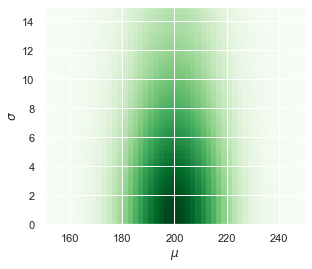

In [23]:
prior = stats.norm(200, 15).pdf(mm) * stats.cauchy(0, 10).pdf(ss)

plt.imshow(prior, cmap='Greens', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

### 1.3 Posterior distribution
As we now have a simple model, not more than two dimensions, and a reasonable idea in which domain we need to search, we can compute the posterior directly by applying Bayes’ rule.

In [24]:
prior.shape
likelihood.shape

(50, 50)

(50, 50)

Text(0.5, 0, '$\\mu$')

Text(0, 0.5, '$\\sigma$')

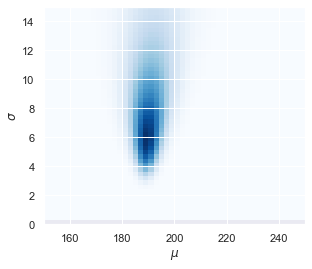

In [25]:
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.nan_to_num(unnormalized_posterior).sum()
plt.imshow(posterior, cmap='Blues', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

## posterior probability

In [21]:
meam_list = pd.DataFrame(f_prior).mean().to_list()
std_list = pd.DataFrame(f_prior).std().to_list()

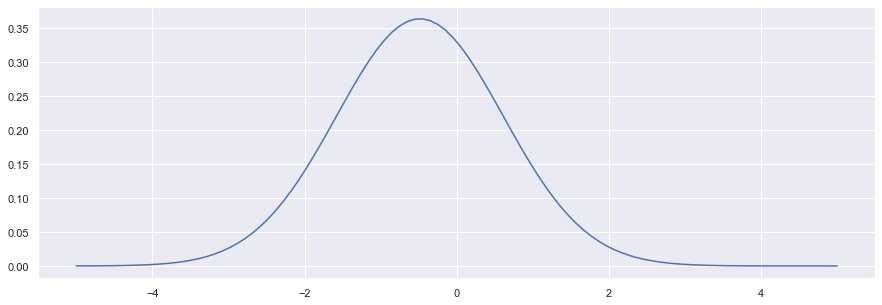

In [23]:
import scipy
like =[]
for x in np.linspace(-5,5, n) :
    like.append(scipy.stats.norm(meam_list[0], std_list[0]).pdf(x))
fig = plt.figure(figsize=(15,5))
plt.plot(X_train, np.array(like))

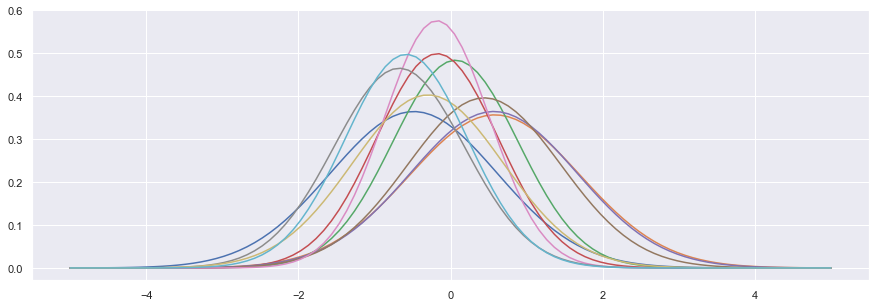

In [24]:
likelihood = []
fig = plt.figure(figsize=(15,5))
for i in np.arange(10) :
    like = np.array([scipy.stats.norm(meam_list[i], std_list[i]).pdf(x) for x in np.linspace(-5,5, n)])
    likelihood.append(like)
    plt.plot(X_train, like)

(100, 10)

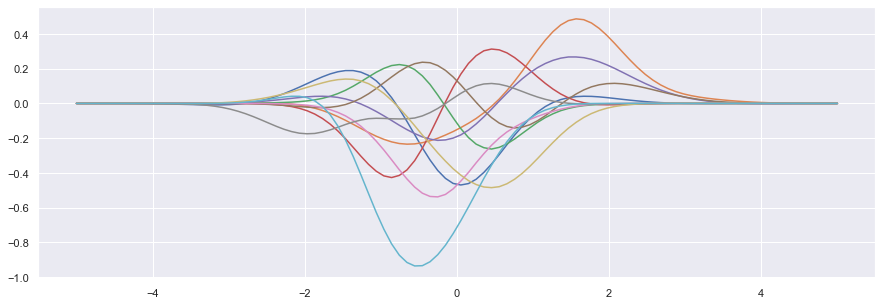

In [25]:
f_posterior = []
for i in np.arange(10) :
    post =  np.array(likelihood)[i, :]*f_prior[:, i]
    f_posterior.append(post)
np.array(f_posterior).T.shape
fig = plt.figure(figsize=(15,5))
plt.plot(X_train, np.array(f_posterior).T)

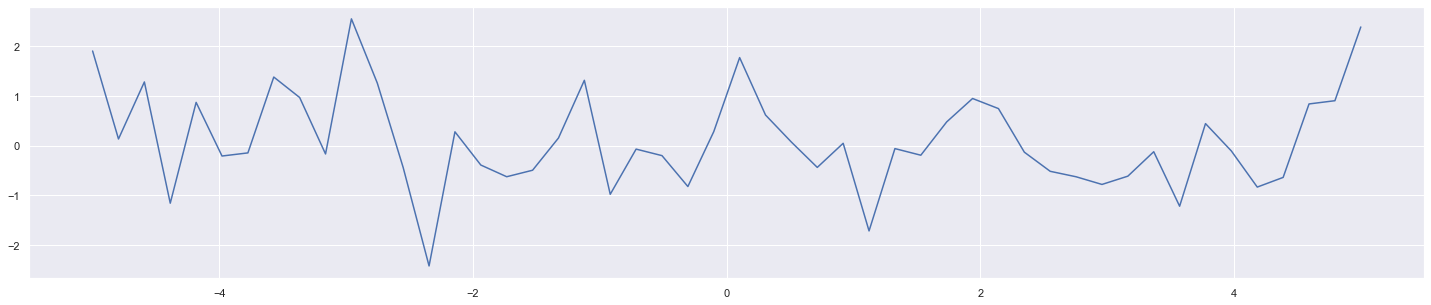

In [26]:
n=50
X_train = np.linspace(-5,5, n).reshape(-1,1)

fig = plt.figure(figsize=(25,5))
norm = np.random.normal(size=(n, 1))
plt.plot(X_train, norm)
mean = norm.mean()
std = norm.std()

In [27]:
like = np.array([scipy.stats.norm(mean, std).pdf(x) for x in X_train])
pd.DataFrame(like).head()
like.shape

,0
0,5.615270e-07
1,1.614434e-06
2,4.446088e-06
3,1.172854e-05
4,2.963587e-05


(50, 1)

In [28]:
f_prior = np.dot(k, np.random.normal(size=(n)))
pd.DataFrame(f_prior).head()
f_prior.shape

ValueError: shapes (100,100) and (50,) not aligned: 100 (dim 1) != 50 (dim 0)

In [29]:
pd.DataFrame(pd.DataFrame(like).values * pd.DataFrame(f_prior).values).plot()

ValueError: operands could not be broadcast together with shapes (50,1) (100,10) 

In [30]:
pd.DataFrame(like * f_prior.reshape(-1,1)).plot()

ValueError: operands could not be broadcast together with shapes (50,1) (1000,1) 

# <font color= 'red'> 1. Wide type data
- melt & pivot
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
- stack & unstack
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [5]:
# let's create panel data_wide typed

np.random.seed(123)
df = pd.DataFrame({'name' : {0 : 'Crystal', 1 : 'Ferguson', 2 : 'Crystal', 3: 'Ferguson'},
                   'year' : {0 : 2016, 1 : 2016, 2 : 2017, 3: 2017},
                   'Jan' : {0 : 450, 1 : 500, 2 : 550, 3: 600},
                   'Feb' : {0 : 1000, 1 : 1100, 2 : 1200, 3: 1400},
                   'Mar' : {0 : 2000, 1 : 2100, 2 : 2200, 3: 2400},
                   'certain'     : dict(zip(range(4), np.random.randn(4))) # whatever it willl be (random effected values)
                  })
df.sort_values(by='name')

,name,year,Jan,Feb,Mar,certain
0,Crystal,2016,450,1000,2000,-1.085631
2,Crystal,2017,550,1200,2200,0.282978
1,Ferguson,2016,500,1100,2100,0.997345
3,Ferguson,2017,600,1400,2400,-1.506295


# <font color= 'red'> 2. Long type data converted by melt()

In [6]:
# unique id is necessary to be melted by Jan, Feb, Mar variables

df['id'] = df.index 

long = pd.melt(df,id_vars=['id','name', 'year'], # Fixed variables
               value_vars=['Jan','Feb','Mar'], # Non fixed variables(melting variables)
               var_name='salary') # the values of melting variable

long.sort_values(by='name')

,id,name,year,salary,value
0,0,Crystal,2016,Jan,450
2,2,Crystal,2017,Jan,550
4,0,Crystal,2016,Feb,1000
6,2,Crystal,2017,Feb,1200
8,0,Crystal,2016,Mar,2000
10,2,Crystal,2017,Mar,2200
1,1,Ferguson,2016,Jan,500
3,3,Ferguson,2017,Jan,600
5,1,Ferguson,2016,Feb,1100
7,3,Ferguson,2017,Feb,1400


# <font color= 'red'> 3. Wide type data with pivot_table()
## Two ways :
- Going back to wide just takes pivot_table(). I prefer this one cause it's simple.
- Going back to wide takes some creative way of unstack() - pls study yourself
    https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [7]:
wide = long.pivot_table(index=['id','name', 'year'], columns='salary', values='value')
wide.reset_index(inplace=True)
wide

salary,id,name,year,Feb,Jan,Mar
0,0,Crystal,2016,1000,450,2000
1,1,Ferguson,2016,1100,500,2100
2,2,Crystal,2017,1200,550,2200
3,3,Ferguson,2017,1400,600,2400


# <font color= 'red'> 4. Wide type data with all rows

In [8]:
wide_all = pd.merge(long[['name', 'year', 'salary']], wide.drop(['id'], axis = 1), on=['name', 'year'])
wide_all

,name,year,salary,Feb,Jan,Mar
0,Crystal,2016,Jan,1000,450,2000
1,Crystal,2016,Feb,1000,450,2000
2,Crystal,2016,Mar,1000,450,2000
3,Ferguson,2016,Jan,1100,500,2100
4,Ferguson,2016,Feb,1100,500,2100
5,Ferguson,2016,Mar,1100,500,2100
6,Crystal,2017,Jan,1200,550,2200
7,Crystal,2017,Feb,1200,550,2200
8,Crystal,2017,Mar,1200,550,2200
9,Ferguson,2017,Jan,1400,600,2400


# <font color= 'red'> 5. Unstack & Stack

In [9]:
header = pd.MultiIndex.from_product([['Semester1','Semester2'],['Maths','Science']])
d=([[12,45,67,56],[78,89,45,67],[45,67,89,90],[67,44,56,55]])
 

df = pd.DataFrame(d,
                  index=['Alisa','Bobby','Cathrine','Jack'],
                  columns=header
                 )    
#df.columns = ['Maths','Science','Maths','Science']
df

Semester1         Semester2        
             Maths Science     Maths Science
Alisa           12      45        67      56
Bobby           78      89        45      67
Cathrine        45      67        89      90
Jack            67      44        56      55

In [10]:
stacked_df=df.stack()
stacked_df

Semester1  Semester2
Alisa    Maths           12         67
         Science         45         56
Bobby    Maths           78         45
         Science         89         67
Cathrine Maths           45         89
         Science         67         90
Jack     Maths           67         56
         Science         44         55

In [11]:
unstacked_df = stacked_df.unstack()
unstacked_df

Semester1         Semester2        
             Maths Science     Maths Science
Alisa           12      45        67      56
Bobby           78      89        45      67
Cathrine        45      67        89      90
Jack            67      44        56      55

In [13]:
d=([['A','C','E'],['B', 'D', 'A'],['C', 'D', 'B']])
 
df = pd.DataFrame(d,
                  index=['Alisa','Bobby','Cathrine'],
                  columns=['Choice_1', 'Choice_2', 'Choice_3']
                 )
df
#df.unstack()

,Choice_1,Choice_2,Choice_3
Alisa,A,C,E
Bobby,B,D,A
Cathrine,C,D,B


In [14]:
ttl_col = []
A = {}

for col in df[['Choice_1', 'Choice_2', 'Choice_3']].columns.to_list() :
    #set(df[col].value_counts(dropna=False).index)
    ttl_col.append(set(df[col].value_counts(dropna=False).index))
    #print('ttl_col', ttl_col)

for i in range(len(df[['Choice_1', 'Choice_2', 'Choice_3']])) :
    new_col = sorted(list(ttl_col[0] | ttl_col[1] | ttl_col[2]))
    for j in new_col :
        df[j] = 0
        
#list(dict.fromkeys(["a", "b", "a", "c", "c"])) # list duplicat remove
        
new_col

df.head()

['A', 'B', 'C', 'D', 'E']

,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,0,0,0,0,0
Bobby,B,D,A,0,0,0,0,0
Cathrine,C,D,B,0,0,0,0,0


In [15]:
for row in df.index.to_list() :
    for col in df[['Choice_1', 'Choice_2', 'Choice_3']].columns.to_list() :
        print('cell :', row, col)
        print('value of cell :', df.loc[row, col])
        for nl in new_col :
            print('new columns :', nl)
            if nl == df.loc[row, col] :
                print('?? :',nl == df.loc[row, col])
                df.loc[row, nl] = 1
                df
    print('**'*30)
                
#df.loc['Alisa', 'Choice_1'] 

cell : Alisa Choice_1
value of cell : A
new columns : A
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,0,0,0
Bobby,B,D,A,0,0,0,0,0
Cathrine,C,D,B,0,0,0,0,0


new columns : B
new columns : C
new columns : D
new columns : E
cell : Alisa Choice_2
value of cell : C
new columns : A
new columns : B
new columns : C
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,0
Bobby,B,D,A,0,0,0,0,0
Cathrine,C,D,B,0,0,0,0,0


new columns : D
new columns : E
cell : Alisa Choice_3
value of cell : E
new columns : A
new columns : B
new columns : C
new columns : D
new columns : E
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,0,0,0,0,0
Cathrine,C,D,B,0,0,0,0,0


************************************************************
cell : Bobby Choice_1
value of cell : B
new columns : A
new columns : B
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,0,1,0,0,0
Cathrine,C,D,B,0,0,0,0,0


new columns : C
new columns : D
new columns : E
cell : Bobby Choice_2
value of cell : D
new columns : A
new columns : B
new columns : C
new columns : D
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,0,1,0,1,0
Cathrine,C,D,B,0,0,0,0,0


new columns : E
cell : Bobby Choice_3
value of cell : A
new columns : A
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,1,1,0,1,0
Cathrine,C,D,B,0,0,0,0,0


new columns : B
new columns : C
new columns : D
new columns : E
************************************************************
cell : Cathrine Choice_1
value of cell : C
new columns : A
new columns : B
new columns : C
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,1,1,0,1,0
Cathrine,C,D,B,0,0,1,0,0


new columns : D
new columns : E
cell : Cathrine Choice_2
value of cell : D
new columns : A
new columns : B
new columns : C
new columns : D
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,1,1,0,1,0
Cathrine,C,D,B,0,0,1,1,0


new columns : E
cell : Cathrine Choice_3
value of cell : B
new columns : A
new columns : B
?? : True


,Choice_1,Choice_2,Choice_3,A,B,C,D,E
Alisa,A,C,E,1,0,1,0,1
Bobby,B,D,A,1,1,0,1,0
Cathrine,C,D,B,0,1,1,1,0


new columns : C
new columns : D
new columns : E
************************************************************


## Fake

In [2]:
import random
from faker import Faker
fake = Faker()
fake = Faker('ko_KR')
fake.name()
fake.month()
random.choice(['Fox', 'Wolf', 'Tiger'])
random.choice([2016, 2017])

'박경자'

'06'

'Fox'

2017

In [3]:
cr =[]
for i in range(10000) :
    cr.append(fake.credit_card_number())
    
len(cr)
len(set(cr)) # set는 중복을 허용하지 않음
pd.DataFrame(cr).shape
pd.DataFrame(cr).nunique()

10000

10000

(10000, 1)

0    10000
dtype: int64

In [4]:
nl = []
yl =[]
cl = []
rl = []

for i in range(100) :
    nl.append(random.choice(['Fox', 'Wolf', 'Tiger']))
    yl.append(random.choice([2016, 2017, 2018, 2017, 2018, 2018, np.nan]))
    cl.append(random.choice([1,1,1, 1, np.nan]))
    rl.append(random.choice([1,0,0,0,0,1]))
    
df1 = pd.DataFrame([nl, yl, cl, rl]).T
df1.columns = ['name', 'year', 'check', 'result']
df1.head()

,name,year,check,result
0,Tiger,2017,1,0
1,Fox,2018,1,0
2,Tiger,NaN,NaN,1
3,Fox,2017,1,1
4,Tiger,2018,1,1


## Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures
https://serialmentor.com/dataviz/aesthetic-mapping.html

## Stochastic simulation helps you grasp concepts of statistics
https://towardsdatascience.com/stochastic-simulation-helps-you-grasp-concepts-of-statistics-befdba517404

In [130]:
dice = np.array([1,2,3,4,5,6])
def dice_throw(dice) :
    return np.random.choice(dice)

for i in range(10):
    print(dice_throw(dice), end=',')

3,5,5,5,1,4,3,6,5,3,

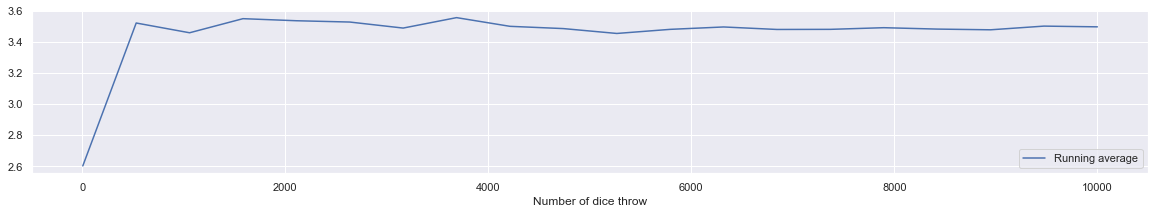

In [131]:
av=[]
n_throws =[]
for i in np.linspace(5, 10000, 20).round(0).astype('int64'):
    throws=[]
    for j in range(i):
        throws.append(dice_throw(dice))
    mean = np.array(throws).mean()
    av.append(mean)
    n_throws.append(i)

df = pd.DataFrame(list(zip(n_throws, av)), columns =['Number of dice throw', 'Running average'])
df.plot('Number of dice throw', 'Running average',figsize=(20,3))

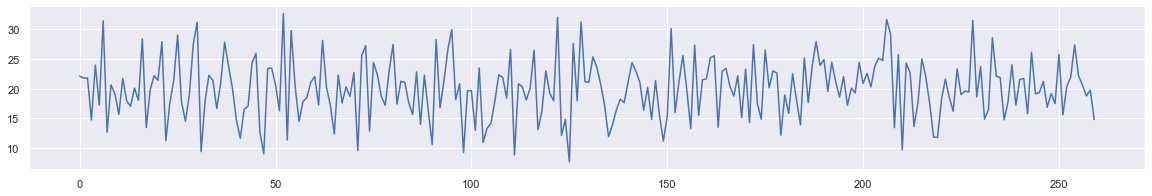

In [132]:
num_weeks = 52*5
production = np.random.normal(loc=20, scale=5, size=num_weeks)
pd.Series(production).plot(figsize=(20,3))

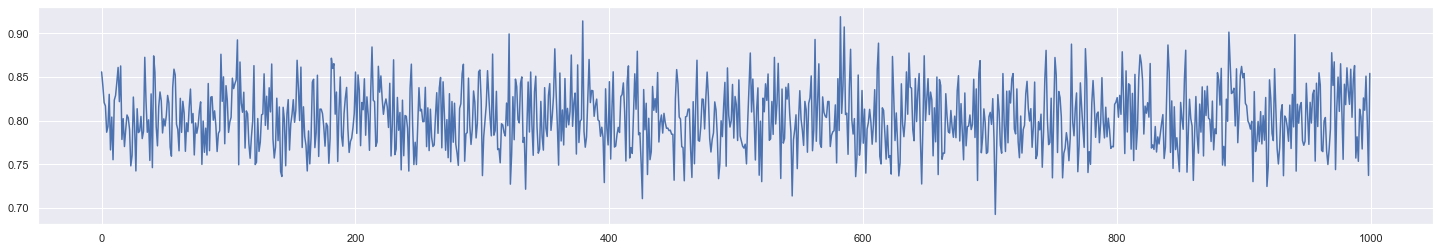

In [144]:
m_list =[]
std_err_list=[]
h_list=[]
n =1000
from scipy import stats
for i in range(n) :
    production = np.random.normal(loc=20, scale=5, size=num_weeks)
    m = production.mean()
    std_err = production.std()/np.sqrt(num_weeks)
    confidence = 0.99
    h = std_err*stats.t.ppf((1+confidence)/2, num_weeks)
    m_list.append(m)
    std_err_list.append(std_err)
    h_list.append(h)
#np.array(m_list); np.array(std_err_list)
pd.Series(np.array(h_list)).plot(figsize=(25,4))

In [134]:
def repeat(n):
    '''
    simulate the factory run 'n' number of times
    Counts the frequency where population mena(i.e.  20) is contained in the Confidence Interval
    '''
    interval_80_count = 0
    interval_90_count = 0
    interval_99_count = 0
    num_weeks =52*5
    
    for i in range(n) :
        production = np.random.normal(loc=20, scale=5, size=num_weeks)
        m = production.mean()
        std_err = production.std()/np.sqrt(num_weeks)
        
        # For 80% C.I.
        confidence = 0.8
        h = std_err*stats.t.ppf((1+confidence)/2, num_weeks)
        if m-h <= 20 <+ m+h:
            interval_80_count += 1
        
        # For 90% C.I.
        confidence = 0.9
        h = std_err*stats.t.ppf((1+confidence)/2, num_weeks)
        if m-h <= 20 <+ m+h:
            interval_90_count += 1
            
        # For 99% C.I.
        confidence = 0.99
        h = std_err*stats.t.ppf((1+confidence)/2, num_weeks)
        if m-h <= 20 <+ m+h:
            interval_99_count += 1
    
    return(interval_80_count, interval_90_count, interval_99_count)

In [135]:
trial = 10000
int_80, int_90, int_99 = repeat(trial)

In [136]:
int_80/trial
int_90/trial
int_99/trial

0.8013

0.903

0.99

## 17 Statistical Hypothesis Tests in Python (Cheat Sheet)
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

## 연속형 변수를 범주형으로 만들고 시각화

In [ ]:
dir_path = 'D:/python code/titanic/'
df = pd.read_csv(dir_path  + 'train.csv')
df.head()

In [137]:
pd.crosstab(df['Fare'],df['Survived']).head()

Survived,0,1
Fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0


In [120]:
fare_data = df[['Survived', 'Fare']]
# Bin the age data
fare_data['Fare_Binned'] = pd.qcut(fare_data['Fare'], q = 10)
fare_data[fare_data.isnull().any(axis=1)]
fare_data.head()

,Survived,Fare,Fare_Binned


,Survived,Fare,Fare_Binned
0,0,7.2500,"(-0.001, 7.55]"
1,1,71.2833,"(39.688, 77.958]"
2,1,7.9250,"(7.854, 8.05]"
3,1,53.1000,"(39.688, 77.958]"
4,0,8.0500,"(7.854, 8.05]"


In [133]:
# Group by the bin and calculate averages
fare_groups  = fare_data.groupby('Fare_Binned').mean()
fare_groups
fare_groups.reset_index()['Fare_Binned'].to_list()

,Survived,Fare
Fare_Binned,,
"(-0.001, 7.55]",0.141304,5.928717
"(7.55, 7.854]",0.298851,7.768490
"(7.854, 8.05]",0.179245,7.963669
"(8.05, 10.5]",0.230769,9.521367
"(10.5, 14.454]",0.428571,12.940231
"(14.454, 21.679]",0.420455,17.386408
"(21.679, 27.0]",0.516854,25.487501
"(27.0, 39.688]",0.373626,32.282186
"(39.688, 77.958]",0.528090,59.444572


[Interval(-0.001, 7.55, closed='right'),
 Interval(7.55, 7.854, closed='right'),
 Interval(7.854, 8.05, closed='right'),
 Interval(8.05, 10.5, closed='right'),
 Interval(10.5, 14.454, closed='right'),
 Interval(14.454, 21.679, closed='right'),
 Interval(21.679, 27.0, closed='right'),
 Interval(27.0, 39.688, closed='right'),
 Interval(39.688, 77.958, closed='right'),
 Interval(77.958, 512.329, closed='right')]

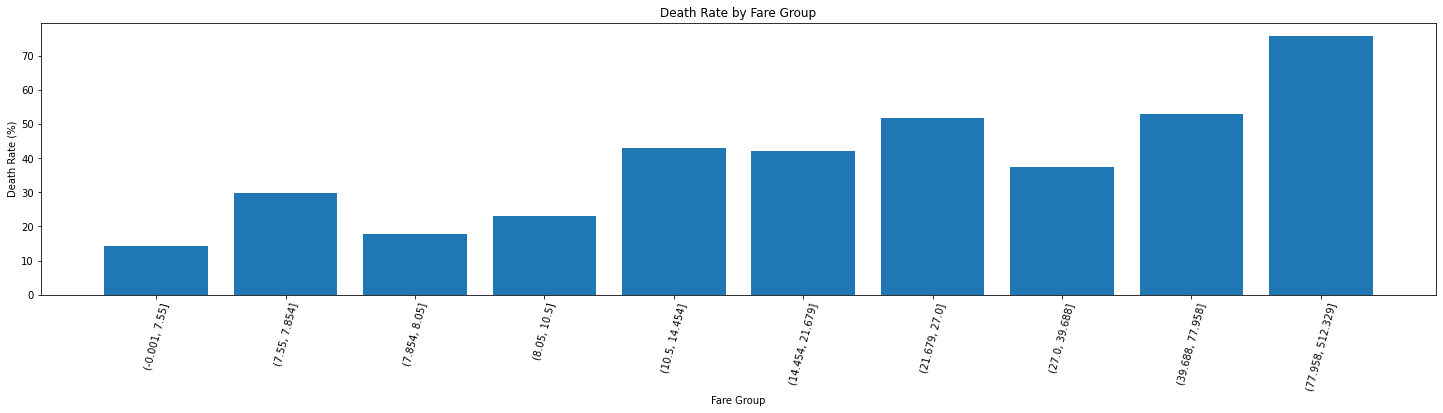

In [127]:
plt.figure(figsize = (25, 5))
# Graph the age bins and the average of the target as a bar plot
plt.bar(fare_groups.index.astype(str), 100 * fare_groups['Survived'])
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Fare Group'); plt.ylabel('Death Rate (%)')
plt.title('Death Rate by Fare Group');

## Feature engineering
- https://github.com/Yimeng-Zhang/feature-engineering-and-feature-selection
- https://github.com/PacktPublishing/Feature-Engineering-Made-Easy

## Categorical Feature Encoding Challenge II
https://www.kaggle.com/kulkarnivishwanath/categorical-feature-encoding-challenge-ii/data?select=train.csv

In [48]:
dir_path = 'D:/Python_data/data/bin_data/'

In [49]:
dtypes = {"day":"float32","month":"float32","target":"uint8","bin_0":"float32","bin_1":"float32","bin_2":"float32","ord_0":"float32"}
# , dtype=dtypes

In [55]:
train = pd.read_csv(dir_path + "train.csv", dtype=dtypes)
test = pd.read_csv(dir_path + "test.csv", dtype=dtypes)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float32
 2   bin_1   581997 non-null  float32
 3   bin_2   582070 non-null  float32
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float32
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [63]:
train.drop("id",axis=1,inplace=True)
Submission = test[['id']]
test.drop('id',axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution of Dependent Variable')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Count')

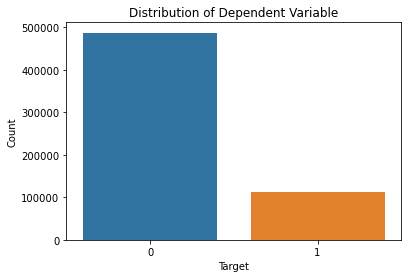

In [64]:
sns.countplot(train['target'])
plt.title("Distribution of Dependent Variable")
plt.xlabel("Target")
plt.ylabel("Count")

In [65]:
cols = [col for col in train.columns if col!='target']
bin_cols = ['bin_0','bin_1','bin_2','bin_3','bin_4']
ord_cols = ['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']
nom_cols = ['nom_0','nom_1','nom_2','nom_3','nom_4','nom_5','nom_6','nom_7','nom_8','nom_9']
print ("Dependent Variables are:{}".format(cols))

Dependent Variables are:['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month']


In [66]:
summary(train)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
bin_0,float32,17894,2.98,2
bin_1,float32,18003,3.00,2
bin_2,float32,17930,2.99,2
bin_3,object,18014,3.00,2
bin_4,object,18047,3.01,2
nom_0,object,18252,3.04,3
nom_1,object,18156,3.03,6
nom_2,object,18035,3.01,6
nom_3,object,18121,3.02,6
nom_4,object,18035,3.01,4


## An Intuitive Explanation of Random Forest and Extra Trees Classifiers
#### Using the Wisdom of the Crowd to Boost Performance
https://towardsdatascience.com/an-intuitive-explanation-of-random-forest-and-extra-trees-classifiers-8507ac21d54b

In [12]:
from sklearn.datasets import load_iris
# Data preprocessing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# To measure performance
from sklearn import metrics

In [15]:
###############################################################################
#                 2. Stump vs Ensemble of 1000 Decision Stumps                #
###############################################################################
# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 100)

# Defining the stump
stump = DecisionTreeClassifier(max_depth = 1)

In [14]:
# Creating an ensemble 
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
                             bootstrap = False)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_stump = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
stump_accuracy = metrics.accuracy_score(y_test, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print message to user
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the ensemble is {ensemble_accuracy*100:.1f} %")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

The accuracy of the stump is 55.0 %
The accuracy of the ensemble is 55.0 %


In [16]:
###############################################################################
#                          3. Stump vs Random Forest                          #
###############################################################################
# Defining the stump
stump = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")

# Create Random Forest 
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
                             bootstrap = True)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
stump_accuracy = metrics.accuracy_score(y_test, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print message to user
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Random Forest is {ensemble_accuracy*100:.1f} %")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
 

The accuracy of the stump is 55.0 %
The accuracy of the Random Forest is 95.0 %


In [17]:
###############################################################################
#                            4. Stump vs Extra Trees                          #
###############################################################################
# Defining the stump
stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# Create Extra Trees
ensemble = BaggingClassifier(base_estimator = stump, n_estimators = 1000,
                             bootstrap = False)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
stump_accuracy = metrics.accuracy_score(y_test, y_pred_stump)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print message to user
print(f"The accuracy of the stump is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
 

The accuracy of the stump is 55.0 %
The accuracy of the Extra Trees is 95.0 %


### 사이킷런으로 확인

In [33]:
np.random.seed(4321)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.95

In [34]:
np.random.seed(4321)
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(bootstrap=True)
et.fit(X_train, y_train)
et.score(X_test, y_test)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

0.9738466076696165

## Top 5 usability tips for Jupyter Notebooks
https://www.linkedin.com/pulse/top-5-usability-tips-jupyter-notebooks-apoorv-kashyap

In [9]:
from IPython.display import HTML

dir_path = 'D:/python code/titanic/'
df = pd.read_csv(dir_path  + 'train.csv')
df.head()
HTML(df.to_html())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [10]:
from bokeh.plotting import show, output_notebook
show()

## pycaret — 코드 몇 줄로 머신러닝 모델 만들기
https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

#### https://medium.com/@john_analyst/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024

In [2]:
from pycaret.classification import *

In [3]:
from pycaret.datasets import get_data
bank = get_data('bank')
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = bank, target = 'deposit')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4844
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(45211, 17)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [59]:
dir_path = 'D:/python code/titanic/'
df = pd.read_csv(dir_path  + 'train.csv')
df.head()
df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

In [60]:
exp1 = setup(df, target = 'Survived', ignore_features=['PassengerId'])

Setup Succesfully Completed!


,Description,Value
0,session_id,285
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [61]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8267,0.8710,0.6821,0.8422,0.7487,0.6195,0.6315,3.9240
1,Ridge Classifier,0.8235,0.0000,0.7076,0.8092,0.7520,0.6167,0.6224,0.0446
2,Ada Boost Classifier,0.8139,0.8444,0.6904,0.8030,0.7378,0.5954,0.6037,0.4635
3,Logistic Regression,0.8123,0.8634,0.6993,0.7916,0.7374,0.5933,0.6003,0.0762
4,Gradient Boosting Classifier,0.8123,0.8688,0.6736,0.8090,0.7315,0.5896,0.5985,0.7905
5,Light Gradient Boosting Machine,0.8091,0.8464,0.7196,0.7712,0.7431,0.5916,0.5939,0.0631
6,Extra Trees Classifier,0.8090,0.8664,0.6527,0.8228,0.7232,0.5807,0.5934,0.1437
7,Decision Tree Classifier,0.8074,0.7869,0.6987,0.7782,0.7338,0.5841,0.5884,0.0371
8,Random Forest Classifier,0.8009,0.8510,0.6404,0.8080,0.7105,0.5625,0.5744,0.1197
9,Extreme Gradient Boosting,0.7978,0.8422,0.7071,0.7508,0.7265,0.5668,0.5689,0.7471


In [62]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8472,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.7937,0.8488,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.7937,0.8381,0.7083,0.7391,0.7234,0.5590,0.5593
3,0.8548,0.8796,0.6957,0.8889,0.7805,0.6744,0.6858
4,0.7903,0.8240,0.7083,0.7391,0.7234,0.5547,0.5550
5,0.8226,0.8109,0.6250,0.8824,0.7317,0.6049,0.6249
6,0.8710,0.9167,0.9167,0.7857,0.8462,0.7362,0.7427
7,0.8226,0.8761,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.7903,0.8355,0.6250,0.7895,0.6977,0.5405,0.5491
9,0.7903,0.7675,0.5833,0.8235,0.6829,0.5330,0.5507


In [64]:
adaboost.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
tuned_lightgbm = tune_model('lightgbm')

SystemExit: (Type Error): The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

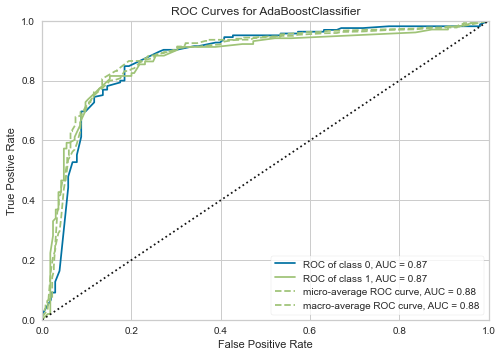

In [37]:
plot_model(estimator = adaboost, plot = 'auc')

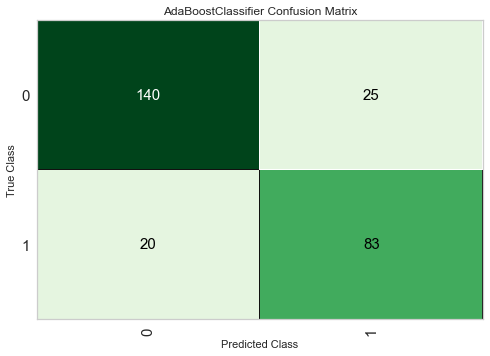

In [38]:
plot_model(estimator = adaboost, plot = 'confusion_matrix')

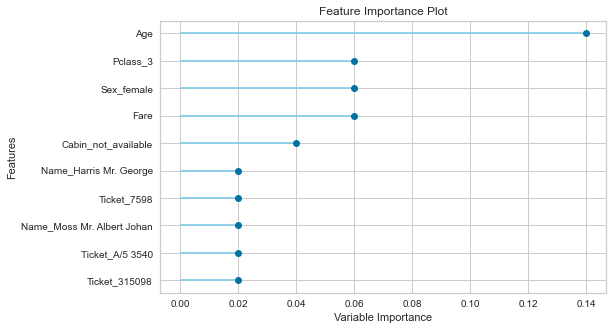

In [40]:
plot_model(estimator = adaboost, plot = 'feature')

In [ ]:
evaluate_model(adaboost)

In [47]:
test = pd.read_csv(dir_path  + 'test.csv')
ada_final = finalize_model(adaboost)
predict_model(ada_final,test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.4890
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.4984
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.4906
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.4819
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.4860
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.5205
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.4855
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.4860


## 몬테카를로 

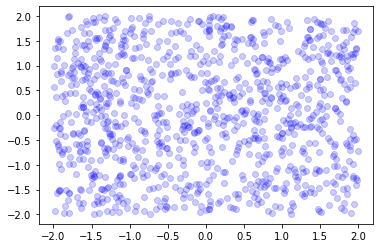

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

s = 1000
xs = np.random.random_sample(s)*4-2
ys = np.random.random_sample(s)*4-2
plt.scatter(xs, ys, c='blue', alpha=0.2)

<Figure size 360x360 with 0 Axes>

3.1


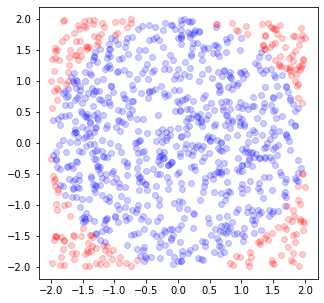

In [23]:
c = 0
plt.figure(figsize=(5, 5))
for i in range(0, s):
    x, y = xs[i], ys[i]
    if x**2 + y**2 <=4:
        c+=1
        plt.scatter(x, y, c='blue', alpha=0.2)
    else:
        plt.scatter(x, y, c='red', alpha=0.2)
print(c/s*4)
plt.show()

## Improve Your Model with Missing Data | Imputation with NumPyro
https://towardsdatascience.com/improve-your-model-with-missing-data-imputation-with-numpyro-dcb3c3376eff

In [67]:
from sklearn.datasets import load_iris
iris_data = load_iris() 
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']],
                      columns=iris_data['feature_names'] + ['target'])
iris_df["target"] = iris_df.target.astype("int")

iris_df = iris_df[iris_df.target.isin([0, 1])]

from numpy.random import rand
random_vec = rand(iris_df["petal length (cm)"].shape[0]) < 0.7 
iris_df["petal length (cm)"] = iris_df["petal length (cm)"].where(random_vec, other=np.nan)
iris_df.head()
iris_df['petal length (cm)'].value_counts(dropna=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,NaN,0.2,0
1,4.9,3.0,NaN,0.2,0
2,4.7,3.2,NaN,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,NaN,0.2,0


NaN    36
1.5     9
1.4     7
1.3     6
1.6     6
4.0     4
4.2     4
4.7     4
4.5     3
3.9     3
1.7     2
4.9     2
4.1     2
5.1     1
3.8     1
5.0     1
3.0     1
3.6     1
4.4     1
1.9     1
1.2     1
4.6     1
4.8     1
4.3     1
1.1     1
Name: petal length (cm), dtype: int64

In [76]:
rand(iris_df["petal length (cm)"].shape[0])
rand(iris_df["petal length (cm)"].shape[0]).mean()
(rand(iris_df["petal length (cm)"].shape[0]) < 0.8).astype(int).sum()

array([0.95132797, 0.03620382, 0.96152003, 0.78621252, 0.8535184 ,
       0.2012406 , 0.49637744, 0.6975361 , 0.64815119, 0.65671832,
       0.15920846, 0.6501275 , 0.41800348, 0.12403093, 0.32457   ,
       0.88399604, 0.26652701, 0.8012451 , 0.77039142, 0.28843457,
       0.82891357, 0.8603426 , 0.16993084, 0.45610661, 0.8347105 ,
       0.05218502, 0.15737112, 0.96644463, 0.63617773, 0.3386665 ,
       0.74214764, 0.89406092, 0.60978539, 0.1444243 , 0.46802701,
       0.7146473 , 0.33016515, 0.72684339, 0.22441638, 0.95874971,
       0.75437017, 0.50247599, 0.53593273, 0.82788765, 0.64480357,
       0.21129694, 0.31134849, 0.88902106, 0.52726384, 0.28844245,
       0.82507205, 0.64673831, 0.46388196, 0.37180151, 0.25156567,
       0.3658698 , 0.01650305, 0.12198749, 0.38260683, 0.95918143,
       0.79820254, 0.53218814, 0.72229266, 0.21846471, 0.59462552,
       0.54984028, 0.95610015, 0.04333875, 0.8355888 , 0.30060151,
       0.89017533, 0.29261042, 0.07349962, 0.49874163, 0.67403

0.5407805401280529

83

## Hashing Feature
https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

In [36]:
import pandas as pd
import numpy as np

df = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

df = pd.DataFrame(df)
df

def hash_col(df, col, N):
    cols = [col + "_" + str(i) for i in range(N)]
    def xform(x): tmp = [0 for i in range(N)]; tmp[hash(x) % N] = 1; return pd.Series(tmp,index=cols)
    df[cols] = df[col].apply(xform)
    return df.drop(col,axis=1)


hash_col(df, 'state', 4)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


,year,pop,state_0,state_1,state_2,state_3
0,2000,1.5,0,1,0,0
1,2001,1.7,0,1,0,0
2,2002,3.6,0,1,0,0
3,2001,2.4,1,0,0,0
4,2002,2.9,1,0,0,0


In [37]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [41]:
df = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(df)
one_hot_df = pd.get_dummies(df, prefix=['state'])
one_hot_df

,year,pop,state_Nevada,state_Ohio
0,2000,1.5,0,1
1,2001,1.7,0,1
2,2002,3.6,0,1
3,2001,2.4,1,0
4,2002,2.9,1,0


## Bin countng, Target mean

In [5]:
df = pd.read_csv('D:/my/data/train.csv', nrows=1000)
df=df[['click', 'device_id']].sample(n=10)
df
df['device_id'].value_counts(normalize=True)

,click,device_id
24,0,a99f214a
235,0,30f17f5f
874,0,8222c466
223,0,a99f214a
134,0,a99f214a
753,0,a99f214a
70,0,a99f214a
718,0,a38955ef
349,0,a99f214a
758,0,a99f214a


a99f214a    0.7
30f17f5f    0.1
8222c466    0.1
a38955ef    0.1
Name: device_id, dtype: float64

In [6]:
target_mean = df.groupby(['device_id'])['click'].mean().to_dict()
df['bin_counts'] = df['device_id'].map(target_mean)
frequency = df['device_id'].value_counts(normalize=True)
df['frequency'] = df['device_id'].map(frequency)
df

,click,device_id,bin_counts,frequency
24,0,a99f214a,0,0.7
235,0,30f17f5f,0,0.1
874,0,8222c466,0,0.1
223,0,a99f214a,0,0.7
134,0,a99f214a,0,0.7
753,0,a99f214a,0,0.7
70,0,a99f214a,0,0.7
718,0,a38955ef,0,0.1
349,0,a99f214a,0,0.7
758,0,a99f214a,0,0.7


#### Feature Engineering for Machine Learning
#### Chapter 5. Categorical Variables: Counting Eggs in the Age of Robotic Chickens

https://www.kaggle.com/ozlerhakan/counting-eggs-in-the-age-of-robotic-chickens?select=train.gz

In [8]:
def click_counting(x, bin_column):
    clicks = pd.Series(x[x['click'] > 0][bin_column].value_counts(), name='clicks')
    no_clicks = pd.Series(x[x['click'] < 1][bin_column].value_counts(), name='no_clicks')
    
    counts = pd.DataFrame([clicks,no_clicks]).T.fillna('0')
    counts['total_clicks'] = counts['clicks'].astype('int64') + counts['no_clicks'].astype('int64')
    return counts

def bin_counting(counts):
    counts['N+'] = counts['clicks'].astype('int64').divide(counts['total_clicks'].astype('int64'))
    counts['N-'] = counts['no_clicks'].astype('int64').divide(counts['total_clicks'].astype('int64'))
    counts['log_N+'] = counts['N+'].divide(counts['N-'])
    # If we wanted to only return bin-counting properties, 
    # we would filter here
    bin_counts = counts.filter(items= ['N+', 'N-', 'log_N+'])
    return counts, bin_counts

In [9]:
bin_column = 'device_id'
device_clicks = click_counting(df.filter(items=[bin_column, 'click']), bin_column)
device_all, device_bin_counts = bin_counting(device_clicks.copy())

In [13]:
device_clicks
device_all
device_bin_counts

,clicks,no_clicks,total_clicks
a99f214a,0,7.0,7
30f17f5f,0,1.0,1
8222c466,0,1.0,1
a38955ef,0,1.0,1


,clicks,no_clicks,total_clicks,N+,N-,log_N+
a99f214a,0,7.0,7,0.0,1.0,0.0
30f17f5f,0,1.0,1,0.0,1.0,0.0
8222c466,0,1.0,1,0.0,1.0,0.0
a38955ef,0,1.0,1,0.0,1.0,0.0


,N+,N-,log_N+
a99f214a,0.0,1.0,0.0
30f17f5f,0.0,1.0,0.0
8222c466,0.0,1.0,0.0
a38955ef,0.0,1.0,0.0


## AUROC
http://dsbyprateekg.blogspot.com/2017/09/machine-learning-cross-validation-roc.html

 
 
조상구
 
AUC is a different type of metric. It measures the ability of the model to predict a higher score for positive examples as compared to negative examples. Since AUC is independent of the selected threshold, you can get a sense of the prediction performance of your model from the AUC metric without picking a threshold.

AUC는 다른 유형의 지표입니다. AUC에서는 부정적인 예보다 긍정적인 예에 대해 더 높은 점수를 예측하는 모델의 기능을 측정합니다. AUC는 선택한 임계값과는 별개이므로, 임계값을 선택하지 않고도 AUC 지표에서 모델의 예측 성능을 파악할 수 있습니다.

## Basis function
https://www.youtube.com/watch?v=OOpfU3CvUkM

## Band
2019년 6월 25일 오전 10:59 

최재석 master의 코드
파이썬의 메시 현란한 코드의 드리블



## Refit
Refit이란?
Code :
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)

---> gridsearch가 모두 끝난 후(parameter를 구한 뒤, hyperparameter)에 마지막으로 refit score를 가지고 전체데이터에 대해서 parameter를 적용하여 an estimator를 구한다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Exhuastive gridsearch
http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

## Cross validation should be always be done before over-sampling
https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

In [1]:
from imblearn.pipeline import Pipeline, make_pipeline

# 1. variation for dependents and regressors
- overall variation; variation over time and individuals
- between variation; variation between individuals
- within deviation; variation within individuals (over time)

In [3]:
group = [1,1,1,2,2,2,3,3,3]
time = [1,2,3,1,2,3,1,2,3]
data =[9,10,11,20,20,20,25,30,35]
df = pd.DataFrame(zip(group, time, data), 
                  columns = ['cluster', 'time', 'data'])

df = pd.merge(df, df.groupby('cluster').mean().reset_index()[['cluster', 'data']], 
              on=['cluster'], how='left')
df.columns = ['cluster', 'time', 'data', 'cluster_mean']
df['overall_mean'] = df['data'].mean()
df['overall_deviation'] =  df['data'] - df['overall_mean']
df['between_deviation'] = df['cluster_mean'] - df['overall_mean']
df['within_deviation'] = df['data'] - df['cluster_mean']
df

,cluster,time,data,cluster_mean,overall_mean,overall_deviation,between_deviation,within_deviation
0,1,1,9,10,20.0,-11.0,-10.0,-1
1,1,2,10,10,20.0,-10.0,-10.0,0
2,1,3,11,10,20.0,-9.0,-10.0,1
3,2,1,20,20,20.0,0.0,0.0,0
4,2,2,20,20,20.0,0.0,0.0,0
5,2,3,20,20,20.0,0.0,0.0,0
6,3,1,25,30,20.0,5.0,10.0,-5
7,3,2,30,30,20.0,10.0,10.0,0
8,3,3,35,30,20.0,15.0,10.0,5


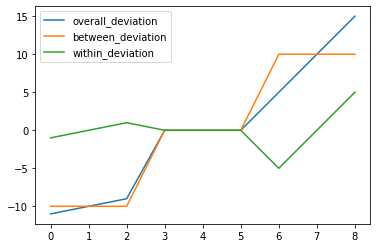

In [4]:
df[['overall_deviation', 'between_deviation', 'within_deviation']].plot()

# 2. 

In [27]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [30]:
[str(n) for n in range(2, 11)] + list('JQKA')
'spades diamonds clubs hearts'.split()
Card = collections.namedtuple('Card', ['rank', 'suit'])
Card

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

['spades', 'diamonds', 'clubs', 'hearts']

__main__.Card

In [33]:
beer_card = Card('5', 'diamonds')
beer_card

Card(rank='5', suit='diamonds')

In [36]:
Person = collections.namedtuple("Person", 'name age gender')
P1 = Person(name='Jhon', age=28, gender='남')
P2 = Person(name='Sally', age=38, gender='여')
for n in [P1, P2]:
    print('%s는(은) %d세의 %s성 입니다.' %n)

Jhon는(은) 28세의 남성 입니다.
Sally는(은) 38세의 여성 입니다.


In [47]:
x = 'ABC'
[ord(x) for x in x]
ord
sum
ord('D')
chr(68) 

[65, 66, 67]

<function ord(c, /)>

<function sum(iterable, start=0, /)>

68

'D'

In [38]:
symbols = '$¢£¥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
codes

[36, 162, 163, 165, 8364, 164]

In [39]:
[ord(s) for s in symbols if ord(s) > 127]

[162, 163, 165, 8364, 164]

In [65]:
symbols = '$¢£¥€¤'
map(ord, symbols)
filter(lambda c: c > 127, map(ord, symbols))
list(filter(lambda c: c > 127, map(ord, symbols)))

symbols = 'ABCDE'

filter(lambda c: c > 67, map(ord, symbols))
list(filter(lambda c: c > 67, map(ord, symbols)))

[162, 163, 165, 8364, 164]

[68, 69]

# 1. 함수

In [2]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))

3
7


In [3]:
num_stamp = 0  # 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp():
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    num_stamp = num_stamp + 1  # ❶ 전역변수를 수정하려고 시도함
    print(num_stamp)

stamp()

UnboundLocalError: local variable 'num_stamp' referenced before assignment

오류가 발생한 과정을 생각해 보자. num_stamp = 값을 대입할 때, 함수 안에서는 num_stamp라는 새로운 지역변수가 생성된다. 그런데 num_stamp에 대입할 값이 공교롭게도 num_stamp + 1이다. 아직 만들어지지 않은 지역변수를 읽으려 한 것이다. 원래 의도는 전역변수 num_stamp의 값을 읽으려는 것이었다. 하지만 함수 안에서 num_stamp에 무언가를 대입하려 했기 때문에 이 변수는 지역변수로 해석되었다. 함수 안에서는 지역변수에만 값을 대입할 수 있기 때문이다.


https://python.bakyeono.net/chapter-3-4.html

In [4]:
num_stamp = 0  # 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp():
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    global num_stamp           # ❶ num_stamp는 전역변수다
    num_stamp = num_stamp + 1  # 이제 오류가 발생하지 않는다
    print(num_stamp)

stamp()  # 화면에 1이 출력된다
stamp()  # 화면에 2가 출력된다

1
2


In [5]:
num_stamp = 0  # ❶ 쿠폰 스탬프가 찍힌 횟수 (전역변수)

def stamp(num_stamp):  # ❷ 지역변수(매개변수) num_stamp
    """쿠폰 스탬프가 찍힌 횟수를 증가시키고, 화면에 출력한다."""
    num_stamp = num_stamp + 1
    print(num_stamp)
    return num_stamp

num_stamp = stamp(num_stamp)  # ❸ 전역변수에 함수의 반환값을 대입한다
num_stamp = stamp(num_stamp)

1
2


https://wikidocs.net/28

In [6]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


계산기 1(add1)의 결과값이 계산기 2((add2)에 아무 영향을 끼치지 않음을 확인할 수 있다. 하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할까? 그때마다 전역 변수와 함수를 추가할 것인가? 여기에 빼기나 곱하기 등의 기능을 추가해야 한다면 상황은 점점 더 어려워질 것이다.

# 2. 클라스(Class)

In [7]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result
    
    def sub(self, num):
        self.result -= num
        return self.result

cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))
cal1.sub(3)
cal1.sub(7)

3
7
3
10


4

-3

Calculator 클래스로 만든 별개의 계산기 cal1, cal2(파이썬에서는 이것을 객체라고 부른다)가 각각의 역할을 수행한다. 그리고 계산기(cal1, cal2)의 결괏값 역시 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다. 클래스를 사용하면 계산기 대수가 늘어나더라도 객체를 생성만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다. 만약 빼기 기능을 더하려면 Calculator 클래스에 다음과 같은 빼기 기능 함수를 추가해 주면 된다.

In [8]:
class FourCol :
    pass

a = FourCol()
b = FourCol()
a
type(a)
b

__main__.FourCol

[객체와 인스턴스의 차이]

클래스로 만든 객체를 인스턴스라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까? 이렇게 생각해 보자. a = Cookie() 이렇게 만든 a는 객체이다. 그리고 a 객체는 Cookie의 인스턴스이다. 즉 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다. "a는 인스턴스"보다는 "a는 객체"라는 표현이 어울리며 "a는 Cookie의 객체"보다는 "a는 Cookie의 인스턴스"라는 표현이 훨씬 잘 어울린다.

In [9]:
class FourCal :
    def setdata(self, first, second):   # ① 메서드의 매개변수
        self.first = first              # ② 메서드의 수행문
        self.second = second            # ② 메서드의 수행문
        
    def add(self):
        result = self.first + self.second
        return result
    
    def mul(self):
        result = self.first * self.second
        return result
    
    def sub(self):
        result = self.first - self.second
        return result
    
    def div(self):
        result = self.first / self.second
        return result

In [10]:
a = FourCal()

In [11]:
a.setdata(4,2) # a 객체의 setdata() 메서드를 사용(class안의 함수를 메서드라고 한다)
print(a.first)
id(a.first)

4


140734862103456

In [12]:
a.add()

6

In [13]:
b= FourCal()
b.setdata(5,7)
b.add()

12

In [14]:
c = FourCal()
c.add()

AttributeError: 'FourCal' object has no attribute 'first'

## Constructor

이렇게 객체에 초깃값을 설정해야 할 필요가 있을 때는 setdata와 같은 메서드를 호출하여 초깃값을 설정하기보다는 생성자를 구현하는 것이 안전한 방법이다. 생성자(Constructor)란 객체가 생성될 때 자동으로 호출되는 메서드를 의미한다.

파이썬 메서드 이름으로 __init__를 사용하면 이 메서드는 생성자가 된다. 다음과 같이 FourCal 클래스에 생성자를 추가해 보자.

In [15]:
class FourCal :
    
    def __init__(self, first, second):
        self.first = first
        self.second = second
    
    def setdata(self, first, second):   # ① 메서드의 매개변수
        self.first = first              # ② 메서드의 수행문
        self.second = second            # ② 메서드의 수행문
        
    def add(self):
        result = self.first + self.second
        return result
    
    def mul(self):
        result = self.first * self.second
        return result
    
    def sub(self):
        result = self.first - self.second
        return result
    
    def div(self):
        result = self.first / self.second
        return result

__init__ 메서드는 setdata 메서드와 이름만 다르고 모든 게 동일하다. 단 메서드 이름을 __init__으로 했기 때문에 생성자로 인식되어 객체가 생성되는 시점에 자동으로 호출되는 차이가 있다.

In [16]:
c = FourCal(4,2)
c.add()

6

# 클래스의 상속

In [17]:
class MoreFourCal(FourCal):
    pass

In [18]:
a = MoreFourCal(4, 2)
a.add()
a.sub()

6

2

왜 상속을 해야 할까?

보통 상속은 기존 클래스를 변경하지 않고 기능을 추가하거나 기존 기능을 변경하려고 할 때 사용한다.

"클래스에 기능을 추가하고 싶으면 기존 클래스를 수정하면 되는데 왜 굳이 상속을 받아서 처리해야 하지?" 라는 의문이 들 수도 있다. 하지만 기존 클래스가 라이브러리 형태로 제공되거나 수정이 허용되지 않는 상황이라면 상속을 사용해야 한다.

In [19]:
class MoreFourCal(FourCal):
    def pow(self):
        result = self.first ** self.second
        return result

In [20]:
a = MoreFourCal(4, 2)
a.pow()

16

# 메서드 오버라이딩

In [21]:
d = FourCal(4, 0)
d.div()

ZeroDivisionError: division by zero

In [22]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second == 0:  # 나누는 값이 0인 경우 0을 리턴하도록 수정
            return print('못 나눠')
        else:
            return self.first / self.second

In [23]:
d = SafeFourCal(4, 0)
d.div()

못 나눠


# 클래스 변수

In [24]:
SafeFourCal(4,2).div()

2.0

In [25]:
class Family:
    lastname = "김"

In [26]:
Family.lastname

'김'

# 3. 모듈

https://wikidocs.net/29

# 4. 패키지